## WEATHER STATISTICS PROJECT
##### MEMBERS : ESPINOUX Jules, FALCOZ Nils, GRUNEWALD Augustin, PICQ Florian

#### 1 - INTRODUCTION TO DATA - NUMERICAL & GRAPHICAL SUMMARIES

In this introduction part we're going to study the dataset, the different categories, size of the set, ... 

In [1]:
data_weather <- read.table("data/donnees-synop-essentielles-omm.csv",
                        header=TRUE,
                        sep=";",
                        quote = "\"") # treat text inside "..." as a single field, even if it contains ;



In [2]:
head(data_weather)
dim(data_weather)
summary(data_weather)


,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,4,Matoury,97307,CA du Centre Littoral,249730045,Guyane,973,Guyane,3,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,414,Lorp-Sentaraille,09289,CC Couserans-Pyrénées,200067940,Ariège,09,Occitanie,76,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,44,,,,NA,,,,NA,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12


[1] 1719567      82

 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1719567     Min.   : 93850        
 1st Qu.: 7207   Class :character   1st Qu.:101180        
 Median : 7577   Mode  :character   Median :101600        
 Mean   :26062                      Mean   :101577        
 3rd Qu.:61976                      3rd Qu.:102090        
 Max.   :89642                      Max.   :107570        
                                    NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.000               
 1st Qu.:  -60.00                  1st Qu.: 2.000               
 Median :   10.00                  Median : 3.000               
 Mean   :   15.39                  Mean   : 4.297               
 3rd Qu.:   90.00                  3rd Qu.: 7.000               
 Max.   : 2990.00                  Max.   :10.000               
 NA's   :40694                     NA's   :68236                
 Directi

- First thing to notice is the huge size of the dataset : dataframe with 82 variables and 1,719,567 data.
- We also have a numerical summary of all the numerical data (summary don't give information for string variables such as the names of the station, the region, ...)

In [3]:
# Showing the labels
names_df <- data.frame(
    index = seq_along(colnames(data_weather)),
    name = colnames(data_weather)
)
print(names_df)

   index                                                      name
1      1                                            ID.OMM.station
2      2                                                      Date
3      3                                    Pression.au.niveau.mer
4      4                         Variation.de.pression.en.3.heures
5      5                             Type.de.tendance.barométrique
6      6                             Direction.du.vent.moyen.10.mn
7      7                               Vitesse.du.vent.moyen.10.mn
8      8                                               Température
9      9                                            Point.de.rosée
10    10                                                  Humidité
11    11                                    Visibilité.horizontale
12    12                                             Temps.présent
13    13                                             Temps.passé.1
14    14                                             Temps.pas

- We have various variables giving a lot of information on the weather at a given station (First variable - see https://www.data.gouv.fr/datasets/liste-des-stations-en-open-data-du-reseau-meteorologique-infoclimat-static-et-meteo-france-synop/ to understand the ID name) and a given date (Second variable)

#### Let's extract similar group of data (temperature, pressure, wind, precipitations, snow)

In [4]:
# Selecting only values related to temperature (first in Kelvin, second in Celsius)
temperature_data <- data_weather[,c(1:2, 8, 25:29)] 
temperature_data_C <- data_weather[,c(1:2, 65:70)] 

# Sorting by ascending date
temperature_data <- temperature_data[order(temperature_data$Date), ]
temperature_data_C <- temperature_data_C[order(temperature_data_C$Date), ]

# To order again the index  
rownames(temperature_data) <- NULL
rownames(temperature_data_C) <- NULL
head(temperature_data)
head(temperature_data_C)


,ID.OMM.station,Date,Température,Température.minimale.sur.12.heures,Température.minimale.sur.24.heures,Température.maximale.sur.12.heures,Température.maximale.sur.24.heures,Température.minimale.du.sol.sur.12.heures
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,294.85,NA,NA,NA,NA,NA
2,7761,2015-08-04T02:00:00+02:00,295.15,NA,NA,NA,NA,NA
3,7020,2015-08-04T02:00:00+02:00,288.85,NA,NA,NA,NA,NA
4,7240,2015-08-04T02:00:00+02:00,292.85,NA,NA,NA,NA,291.55
5,81415,2015-08-04T02:00:00+02:00,297.55,NA,NA,NA,NA,NA
6,7110,2015-08-04T02:00:00+02:00,286.35,NA,NA,NA,NA,282.85


,ID.OMM.station,Date,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,21.7,NA,NA,NA,NA,NA
2,7761,2015-08-04T02:00:00+02:00,22.0,NA,NA,NA,NA,NA
3,7020,2015-08-04T02:00:00+02:00,15.7,NA,NA,NA,NA,NA
4,7240,2015-08-04T02:00:00+02:00,19.7,NA,NA,NA,NA,18.4
5,81415,2015-08-04T02:00:00+02:00,24.4,NA,NA,NA,NA,NA
6,7110,2015-08-04T02:00:00+02:00,13.2,NA,NA,NA,NA,9.7


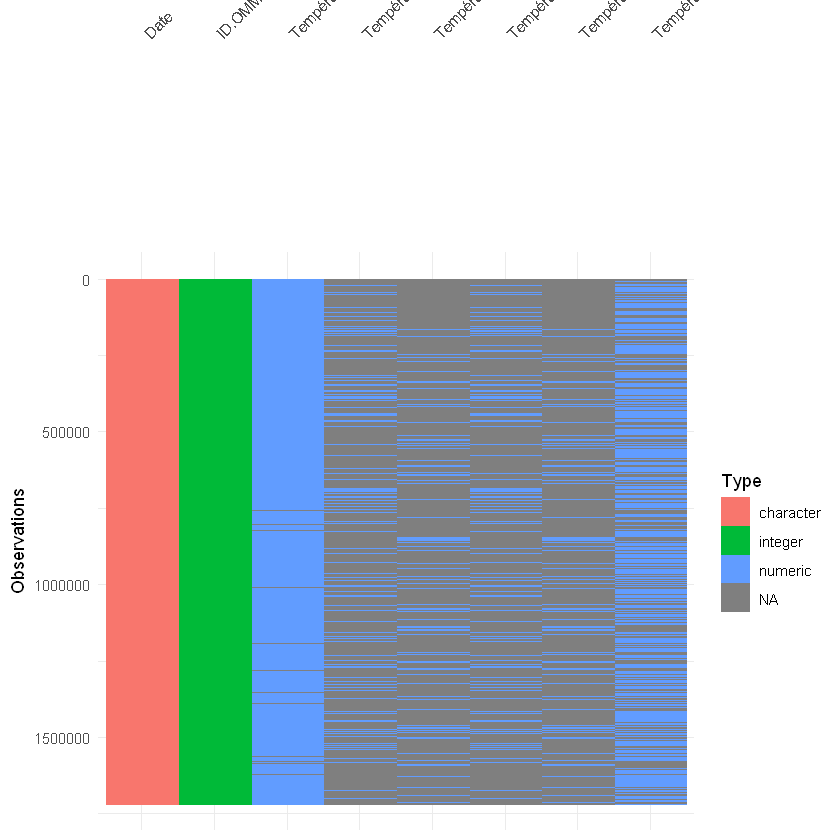

In [7]:
# Chart to visualize missing temperature data

library(visdat)
vis_dat(temperature_data, warn_large_data = FALSE)

In [9]:
# Selecting only values related to pressure
pressure_data <- data_weather[, c(1:5, 21:22)]

# Ordering by ascending date
pressure_data <- pressure_data[order(pressure_data$Date), ]

# To order again the index  
row.names(pressure_data) <- NULL
head(pressure_data)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Pression.station,Niveau.barométrique
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,101570,30,1,101430,NA
2,7761,2015-08-04T02:00:00+02:00,101600,50,0,101500,NA
3,7020,2015-08-04T02:00:00+02:00,101390,-10,7,101130,NA
4,7240,2015-08-04T02:00:00+02:00,101410,130,3,100110,NA
5,81415,2015-08-04T02:00:00+02:00,101370,270,3,100160,NA
6,7110,2015-08-04T02:00:00+02:00,101490,40,1,100350,NA


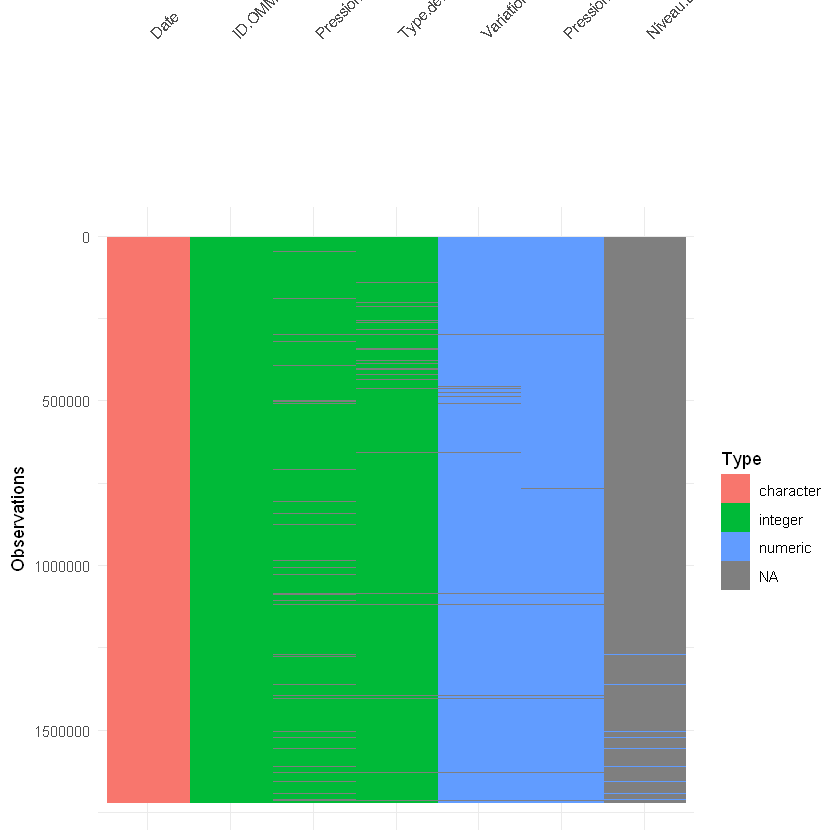

In [10]:
# Chart to visualize missing pressure data

library(visdat)
vis_dat(pressure_data, warn_large_data = FALSE)

In [11]:
# Selecting only values related to precipitation
precipitation_data <- data_weather[, c(1:2, 10, 39:43)]

# Ordering by ascending date
precipitation_data <- precipitation_data[order(precipitation_data$Date), ]

# To order again the index  
row.names(precipitation_data) <- NULL
head(precipitation_data)

,ID.OMM.station,Date,Humidité,Précipitations.dans.la.dernière.heure,Précipitations.dans.les.3.dernières.heures,Précipitations.dans.les.6.dernières.heures,Précipitations.dans.les.12.dernières.heures,Précipitations.dans.les.24.dernières.heures
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,68,0.0,0.0,0.0,0.0,0.0
2,7761,2015-08-04T02:00:00+02:00,86,0.0,0.0,0.0,0.0,0.0
3,7020,2015-08-04T02:00:00+02:00,88,0.0,-0.1,0.2,4.0,4.2
4,7240,2015-08-04T02:00:00+02:00,81,-0.1,-0.1,-0.1,-0.1,-0.1
5,81415,2015-08-04T02:00:00+02:00,91,0.2,1.8,1.8,1.8,1.8
6,7110,2015-08-04T02:00:00+02:00,88,0.0,0.0,0.0,0.8,2.4


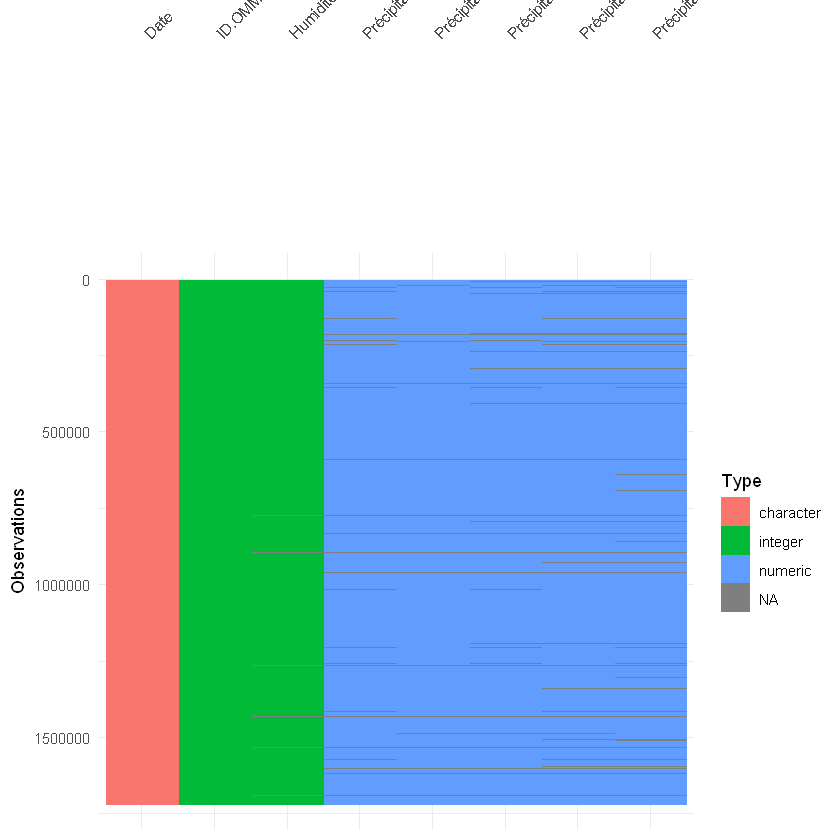

In [12]:
# Chart to visualize missing precipitation data

library(visdat)
vis_dat(precipitation_data, warn_large_data = FALSE)

In [13]:
# Getting all the different stations
stations <- unique(temperature_data$ID.OMM.station)
stations

[1]  7790  7761  7020  7240 81415  7110 61976 71805  7027  7072  7117  7130
[13]  7190  7207  7255  7535  7149  7222  7299  7314  7335  7471 81408  7591
[25]  7690 78897  7037  7168 89642  7510  7747  7181 61997 78922  7577  7643
[37]  7607 81401  7460  7661 81405  7015 61998  7558  7621  7630  7481  7139
[49]  7280 61996  7434  7650  7005  7627 78925 61980 67005 61972 61968 78894
[61] 78890 61970

#### Let's take a look at station 7790 for example

In [15]:
# Only looking at station 7790 for example
library(lubridate)
temperature_data_C_7790 <- temperature_data_C[temperature_data_C$ID.OMM.station == 7790,]
pressure_data_7790 <- pressure_data[pressure_data$ID.OMM.station == 7790,]
precipitation_data_7790 <- precipitation_data[precipitation_data$ID.OMM.station == 7790,]

# Conversion of the date format & checking that the steps (3, 6, 9, 12, 27 hours)
temperature_data_C_7790$DateTime <- ymd_hms(temperature_data_C_7790$Date)
pressure_data_7790$DateTime <- ymd_hms(pressure_data_7790$Date)
precipitation_data_7790$DateTime <- ymd_hms(precipitation_data_7790$Date)
diffs <- as.numeric(diff(temperature_data_C_7790$DateTime), units = "hours")
unique(diffs)
head(temperature_data_C_7790)
head(pressure_data_7790)
head(precipitation_data_7790)


Attachement du package : 'lubridate'


Les objets suivants sont masqués depuis 'package:base':

    date, intersect, setdiff, union




[1]  3  6 12  9 27

,ID.OMM.station,Date,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.,DateTime
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,7790,2015-08-04T02:00:00+02:00,21.7,NA,NA,NA,NA,NA,2015-08-04 00:00:00
67,7790,2015-08-04T05:00:00+02:00,21.5,NA,NA,NA,NA,NA,2015-08-04 03:00:00
113,7790,2015-08-04T08:00:00+02:00,24.3,NA,NA,NA,NA,NA,2015-08-04 06:00:00
194,7790,2015-08-04T11:00:00+02:00,32.2,NA,NA,NA,NA,NA,2015-08-04 09:00:00
261,7790,2015-08-04T14:00:00+02:00,30.8,NA,NA,NA,NA,NA,2015-08-04 12:00:00
288,7790,2015-08-04T17:00:00+02:00,30.4,NA,NA,NA,NA,NA,2015-08-04 15:00:00


,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Pression.station,Niveau.barométrique,DateTime
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dttm>
1,7790,2015-08-04T02:00:00+02:00,101570,30,1,101430,NA,2015-08-04 00:00:00
67,7790,2015-08-04T05:00:00+02:00,101460,-110,7,101320,NA,2015-08-04 03:00:00
113,7790,2015-08-04T08:00:00+02:00,101520,60,3,101380,NA,2015-08-04 06:00:00
194,7790,2015-08-04T11:00:00+02:00,101480,-40,8,101340,NA,2015-08-04 09:00:00
261,7790,2015-08-04T14:00:00+02:00,101450,-30,8,101310,NA,2015-08-04 12:00:00
288,7790,2015-08-04T17:00:00+02:00,101410,-40,7,101270,NA,2015-08-04 15:00:00


,ID.OMM.station,Date,Humidité,Précipitations.dans.la.dernière.heure,Précipitations.dans.les.3.dernières.heures,Précipitations.dans.les.6.dernières.heures,Précipitations.dans.les.12.dernières.heures,Précipitations.dans.les.24.dernières.heures,DateTime
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,7790,2015-08-04T02:00:00+02:00,68,0,0,0,0,0,2015-08-04 00:00:00
67,7790,2015-08-04T05:00:00+02:00,58,0,0,0,0,0,2015-08-04 03:00:00
113,7790,2015-08-04T08:00:00+02:00,51,0,0,0,0,0,2015-08-04 06:00:00
194,7790,2015-08-04T11:00:00+02:00,32,0,0,0,0,0,2015-08-04 09:00:00
261,7790,2015-08-04T14:00:00+02:00,47,0,0,0,0,0,2015-08-04 12:00:00
288,7790,2015-08-04T17:00:00+02:00,50,0,0,0,0,0,2015-08-04 15:00:00


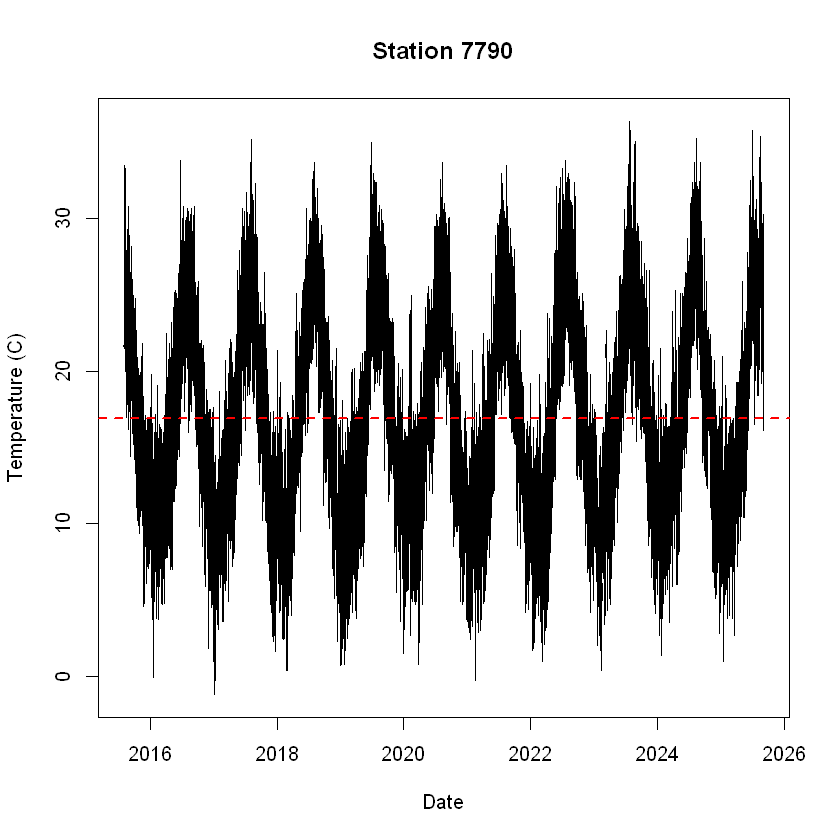

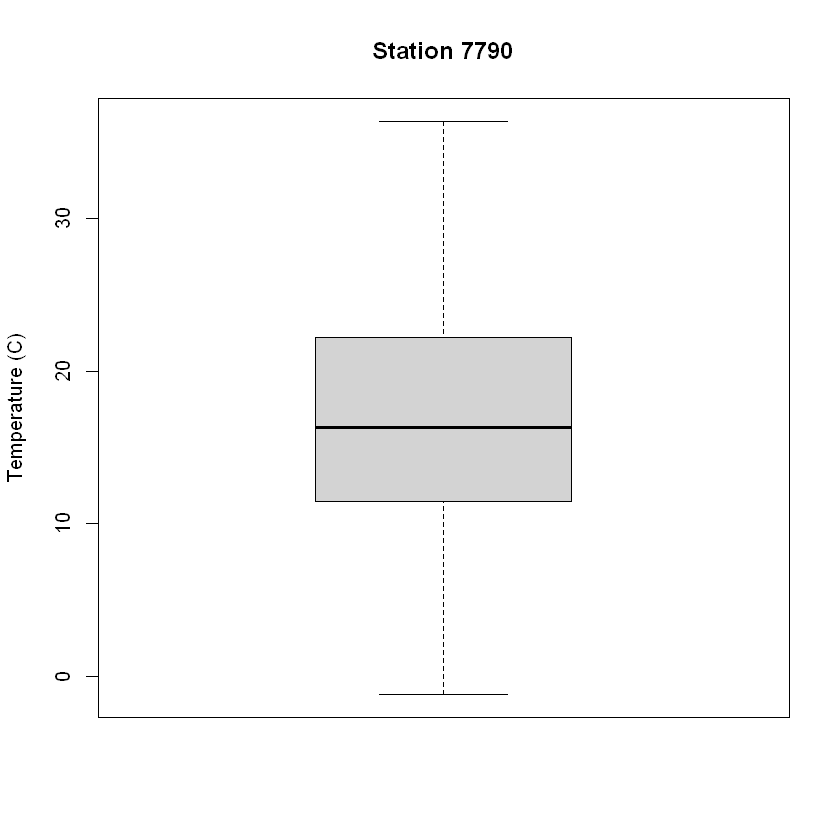

In [16]:
# Looking at the temperature
par(bg = "white")
plot(temperature_data_C_7790$DateTime, 
    temperature_data_C_7790$`Température...C.`, 
    type = "l",
    xlab = "Date", 
    ylab = "Temperature (C)", 
    main = "Station 7790")

abline(h = mean(temperature_data_C_7790$`Température...C.`, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

boxplot(temperature_data_C_7790$`Température...C.`, 
    ylab = "Temperature (C)", 
    main = "Station 7790")

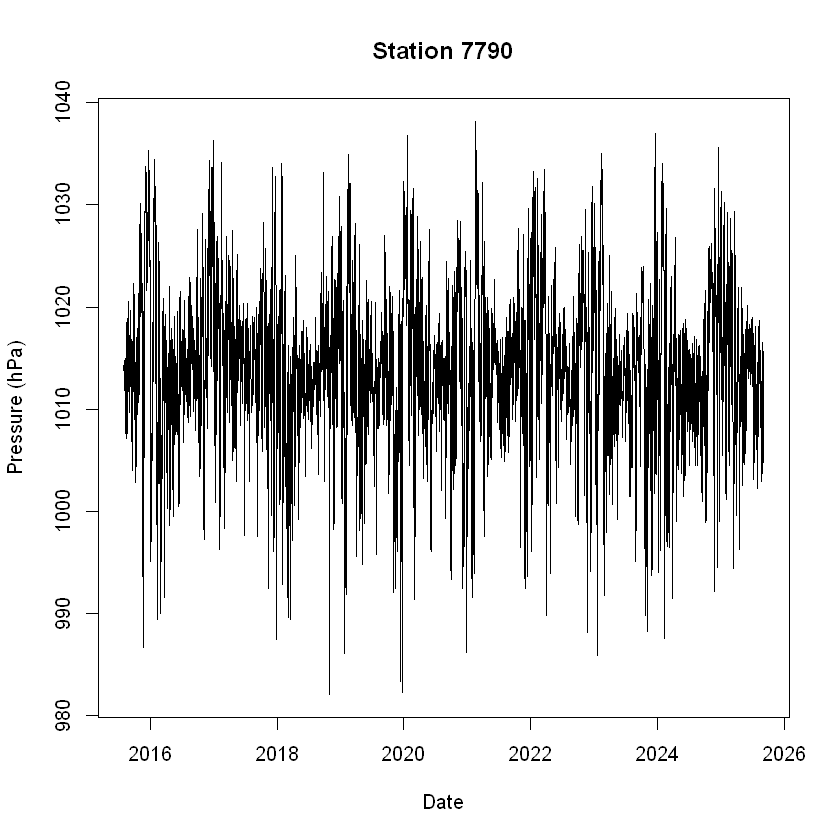

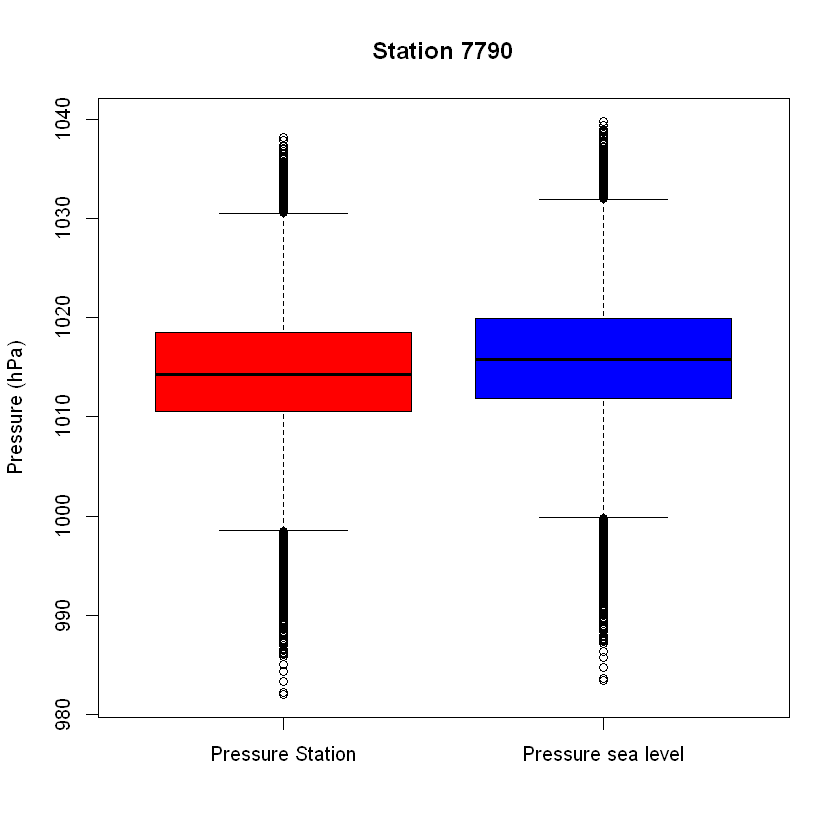

In [17]:
# Looking at the pressure
par(bg = "white")
plot(pressure_data_7790$DateTime, 
    pressure_data_7790$Pression.station/100, 
    type = "l",
    xlab = "Date", 
    ylab = "Pressure (hPa)", 
    main = "Station 7790")

boxplot(pressure_data_7790$Pression.station/100, 
    pressure_data_7790$Pression.au.niveau.mer/100,
    names = c("Pressure Station", "Pressure sea level"),
    col = c("red", "blue"),
    ylab = "Pressure (hPa)", 
    main = "Station 7790")


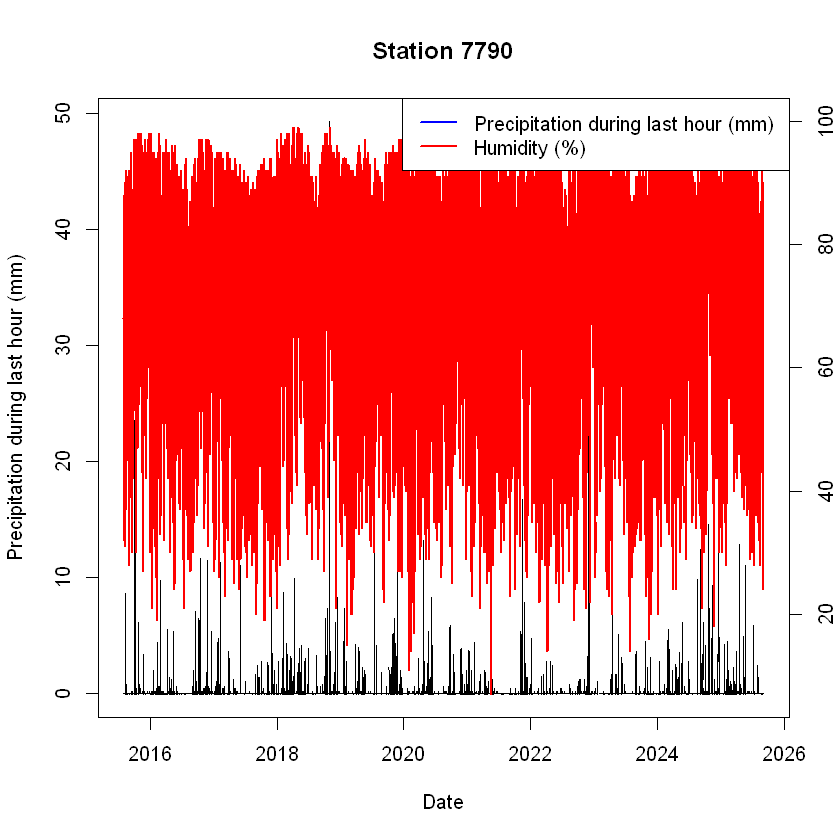

In [18]:
# Looking at the precipitation 
par(bg = "white")
plot(precipitation_data_7790$DateTime, 
    precipitation_data_7790$Précipitations.dans.la.dernière.heure, 
    type = "l",
    xlab = "Date", 
    ylab = "Precipitation during last hour (mm)", 
    main = "Station 7790")

par(new = TRUE)
plot(precipitation_data_7790$DateTime, 
      precipitation_data_7790$Humidité, 
      type = "l", col = "red", lwd = 2, axes = FALSE, xlab = "", ylab = "")
axis(side = 4)  # y axe to the right 
mtext("Humidity (%)", side = 4, line = 3)

legend("topright", legend = c("Precipitation during last hour (mm)", "Humidity (%)"),
       col = c("blue", "red"), lwd = 2)

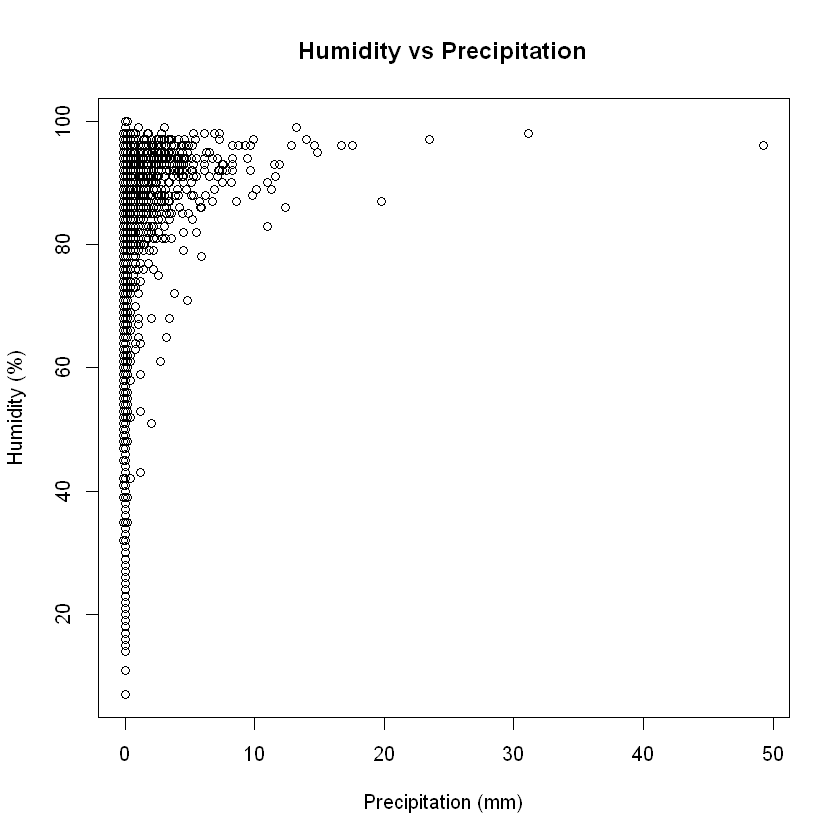

In [19]:
par(bg = "white")
plot(precipitation_data_7790$Précipitations.dans.la.dernière.heure, 
    precipitation_data_7790$Humidité,
    xlab = "Precipitation (mm)",
    ylab = "Humidity (%)",
    main = "Humidity vs Precipitation")

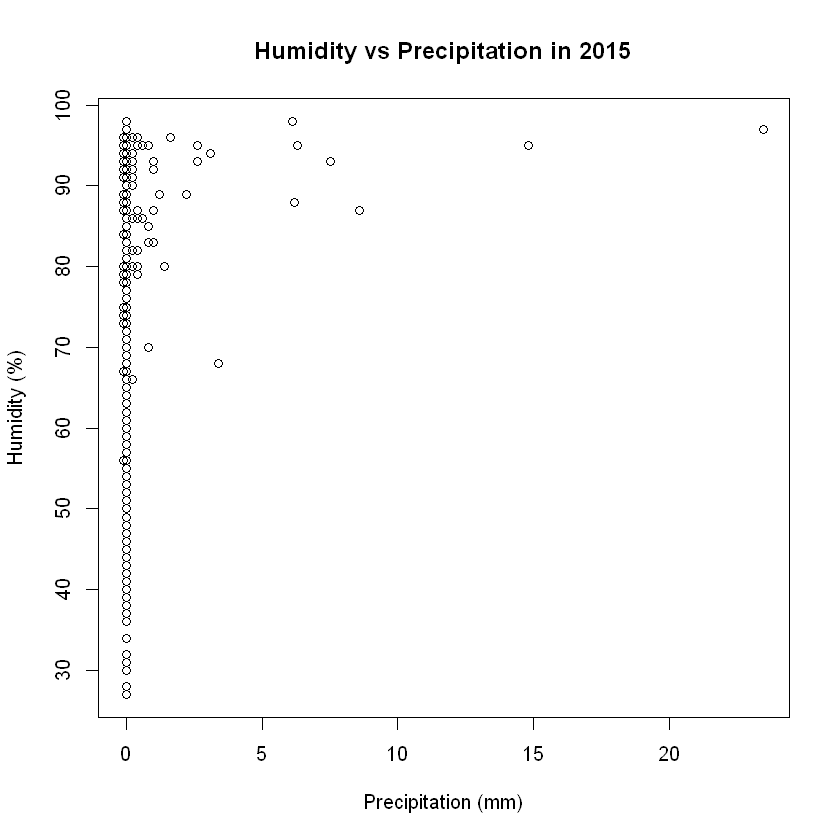

In [20]:
# Only the year 2015
precipitation_data_7790_2015 <- precipitation_data_7790[format(precipitation_data_7790$DateTime, "%Y") == 2015,] # Keeping only the date with the year 2015

par(bg = "white")
plot(precipitation_data_7790_2015$Précipitations.dans.la.dernière.heure, 
    precipitation_data_7790_2015$Humidité,
    xlab = "Precipitation (mm)",
    ylab = "Humidity (%)",
    main = "Humidity vs Precipitation in 2015")


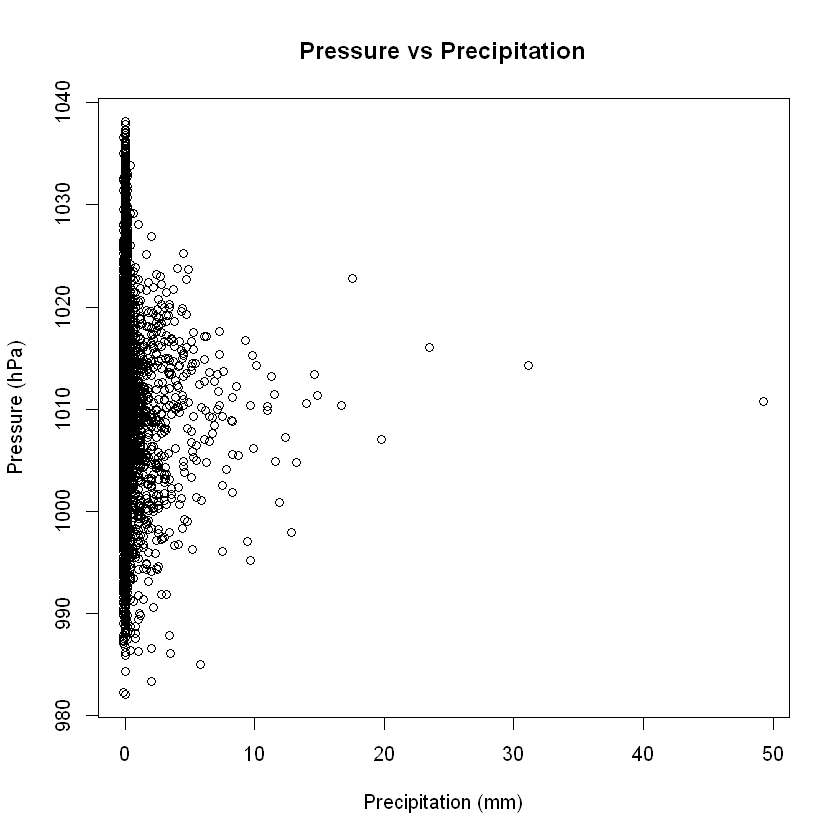

In [21]:
par(bg = "white")
plot(precipitation_data_7790$Précipitations.dans.la.dernière.heure, 
    pressure_data_7790$Pression.station/100,
    xlab = "Precipitation (mm)",
    ylab = "Pressure (hPa)",
    main = "Pressure vs Precipitation")

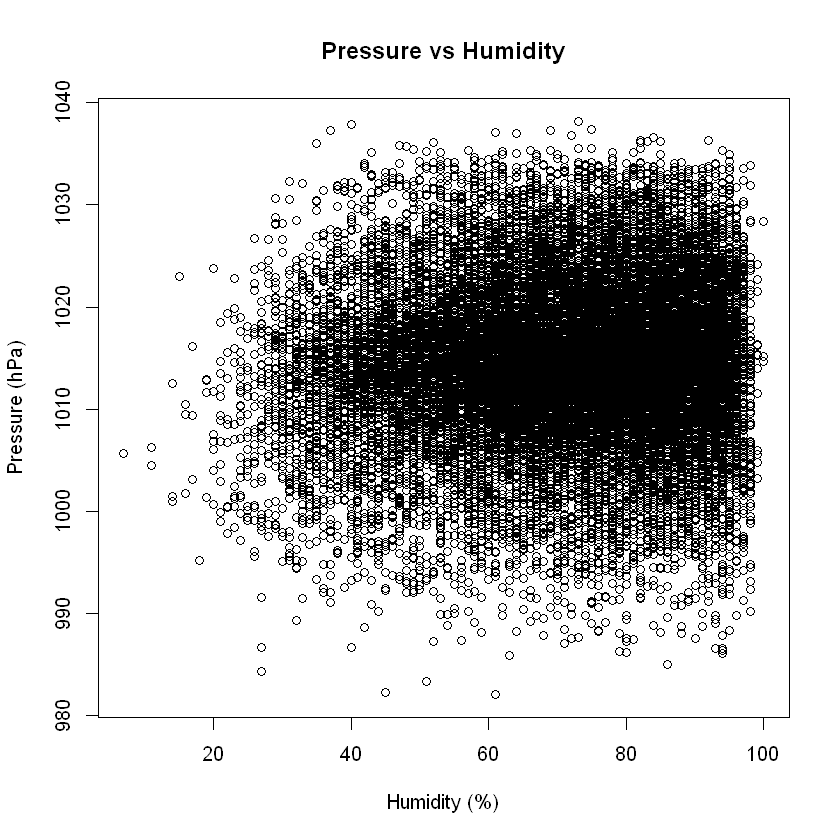

In [22]:
par(bg = "white")
plot(precipitation_data_7790$`Humidité`, 
    pressure_data_7790$Pression.station/100,
    xlab = "Humidity (%)",
    ylab = "Pressure (hPa)",
    main = "Pressure vs Humidity")

#### Looking at the average temperature on all stations

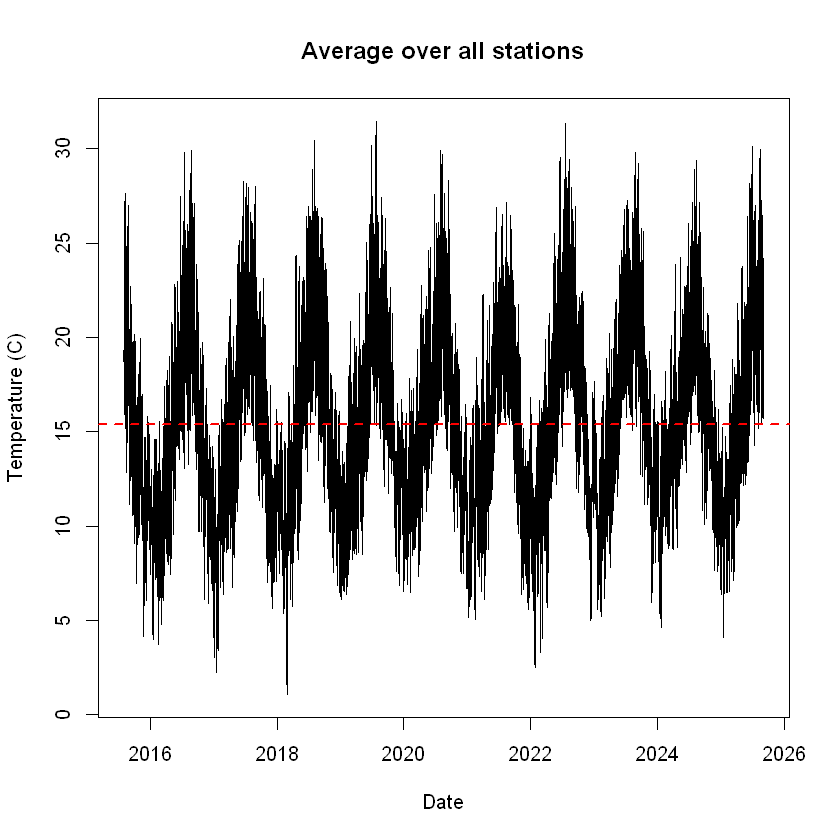

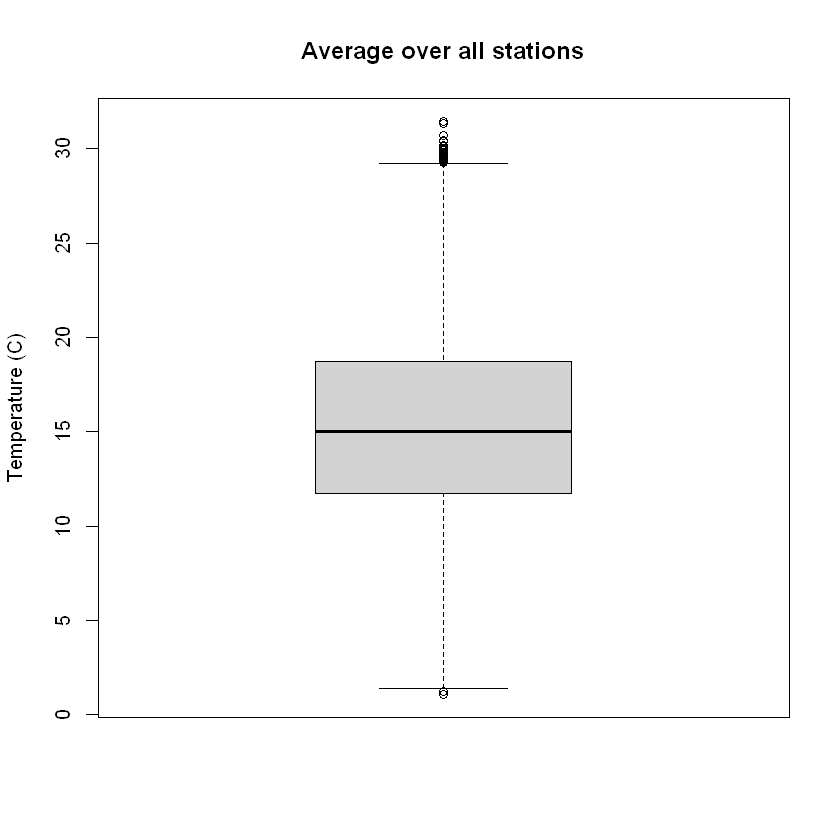

In [23]:
# Conversion of the date format & checking that the steps (3, 6, 9, 12, 27 hours)
temperature_data_C$DateTime <- ymd_hms(temperature_data_C$Date)

temperature_avg <- aggregate(`Température...C.` ~ DateTime, 
                             data = temperature_data_C, 
                             FUN = mean, 
                             na.rm = TRUE)

# Looking at the temperature
par(bg = "white")
plot(temperature_avg$DateTime, 
    temperature_avg$`Température...C.`, 
    type = "l",
    xlab = "Date", 
    ylab = "Temperature (C)", 
    main = "Average over all stations")

abline(h = mean(temperature_avg$`Température...C.`, na.rm = TRUE), col = "red", lwd = 2, lty = 2)

boxplot(temperature_avg$`Température...C.`, 
    ylab = "Temperature (C)", 
    main = "Average over all stations")

In [24]:
# Averaging the temperature for each stations over all dates and try to cluster the stations
temperature_avg_station <- aggregate(`Température...C.` ~ ID.OMM.station, 
                             data = temperature_data_C, 
                             FUN = function(x) mean(x, na.rm = TRUE))

summary(temperature_avg_station)
#data_weather$communes..name.[data_weather$ID.OMM.station == 7005]

#station_id <- 7005  # exemple
#temps_station <- temperature_data_C$`Température...C.`[temperature_data_C$ID.OMM.station == station_id]
#summary(temps_station)

station_id <- 89642  # exemple
temps_station <- temperature_data_C$`Température...C.`[temperature_data_C$ID.OMM.station == station_id]
summary(temps_station)
#data_weather$
data_weather$Nom[data_weather$ID.OMM.station == station_id]

 ID.OMM.station  Température...C.
 Min.   : 7005   Min.   :-10.98  
 1st Qu.: 7226   1st Qu.: 12.13  
 Median : 7599   Median : 13.40  
 Mean   :28291   Mean   : 15.87  
 3rd Qu.:61979   3rd Qu.: 17.01  
 Max.   :89642   Max.   : 28.25  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -33.50  -16.50  -11.30  -10.98   -4.70    6.70       3 

[1] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
    [4] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
    [7] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [10] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [13] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [16] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [19] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [22] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [25] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [28] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [31] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [34] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [37] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [40] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [43] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [46] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [49] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [52] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [55] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [58] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [61] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [64] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [67] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [70] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [73] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [76] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [79] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [82] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [85] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [88] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [91] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [94] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
   [97] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [100] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [103] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [106] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [109] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [112] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [115] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [118] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [121] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [124] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [127] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [130] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [133] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [136] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [139] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [142] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [145] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [148] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [151] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [154] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [157] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [160] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [163] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [166] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [169] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [172] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [175] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [178] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [181] "DUMONT D'URVILLE" "DUMONT D'URVILLE" "DUMONT D'URVILLE"
  [184] "DUMONT D'URVILLE" "DUMONT D'UR